In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Null data check

In [8]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percenct of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percenct of NaN value: 0.00%
column :   Survived	 Percenct of NaN value: 0.00%
column :     Pclass	 Percenct of NaN value: 0.00%
column :       Name	 Percenct of NaN value: 0.00%
column :        Sex	 Percenct of NaN value: 0.00%
column :        Age	 Percenct of NaN value: 19.87%
column :      SibSp	 Percenct of NaN value: 0.00%
column :      Parch	 Percenct of NaN value: 0.00%
column :     Ticket	 Percenct of NaN value: 0.00%
column :       Fare	 Percenct of NaN value: 0.00%
column :      Cabin	 Percenct of NaN value: 77.10%
column :   Embarked	 Percenct of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percenct of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percenct of NaN value: 0.00%
column :     Pclass	 Percenct of NaN value: 0.00%
column :       Name	 Percenct of NaN value: 0.00%
column :        Sex	 Percenct of NaN value: 0.00%
column :        Age	 Percenct of NaN value: 20.57%
column :      SibSp	 Percenct of NaN value: 0.00%
column :      Parch	 Percenct of NaN value: 0.00%
column :     Ticket	 Percenct of NaN value: 0.00%
column :       Fare	 Percenct of NaN value: 0.24%
column :      Cabin	 Percenct of NaN value: 78.23%
column :   Embarked	 Percenct of NaN value: 0.00%


<AxesSubplot:>

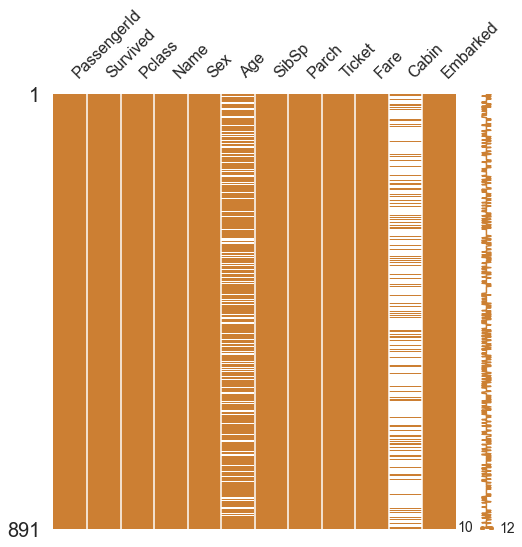

In [10]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

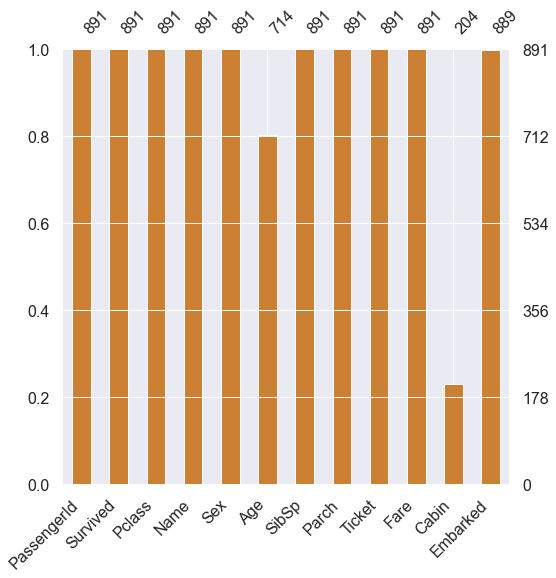

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

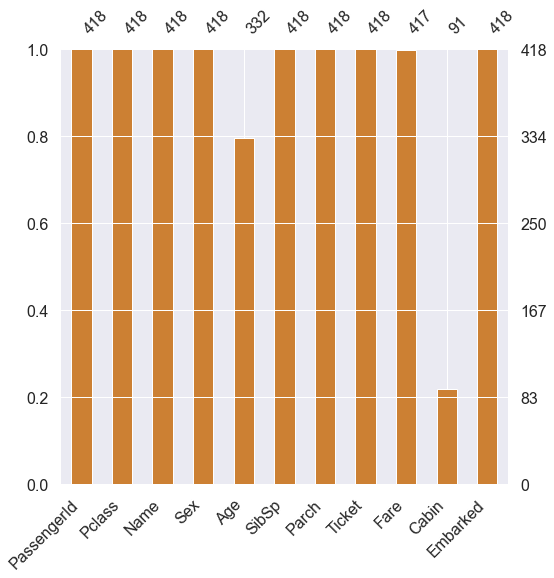

In [12]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

# Target Label 확인

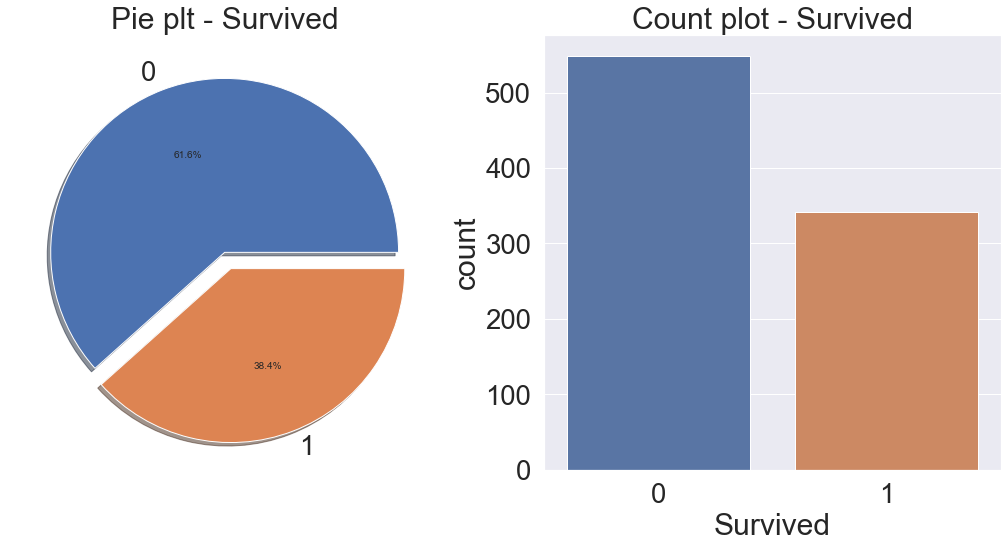

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plt - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

안타깝게도 죽은 사람이 많다   
38.4%가 살아남았다   
target label의 분포가 제법 균일하다. 불균일한 경우, 예를들어서 100중 1이 99, 0이 1개인 경우에는 만약
모델이 모든것을 1이라 해도 정확도가 99%가 나오게 된다. 0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 된다. 지금 문제에서는 그렇지 않으니 계속 진행.

# Exploratory data analysis

이제 본격적으로 데이터 분석을 한다. 데이터는 매우 많다. 이 많은 데이터 안에서 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요하다.   

시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있다. 특정 목적에 맞는 소스코드를 정리해서 필요할 때 마다 참고하면 편하다

## 2.1 Pclass

먼저 Pclass에 대해 살펴본다. Pclass는 ordinal, 서수형 데이터이다. 카테고리이면서 순서가 있는 데이터 타입   

먼저 Pclass에 따른 생존률의 차이를 살펴본다. 엑셀의 피벗차트와 유사한 작업을 하게 되는데, pandas dataframe에서는 groupby를 사용하면 쉽게 쓸 수 있다. pivot도 있음   

Pclass, Survived를 가져온 후 pclass로 묶는다. 그러고 나면 각 pclass마다 0,1이 count되는데, 이를 평균내면 pclass별 생존률이 나온다    

아래와 같이 count()하면 각 class에 몇명이 있는지 확인할 수 있으며, sum을 하면 216명 중 생존한 사람의 총합을 주게 된다 

In [14]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


Pandas의 crosstab을 사용하면 위의 과정을 좀 더 수월하게 볼 수 있다 

In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


grouped 객체에 mean()을 하게되면, 각 클래스별 생존률을 얻을 수 있다. 

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

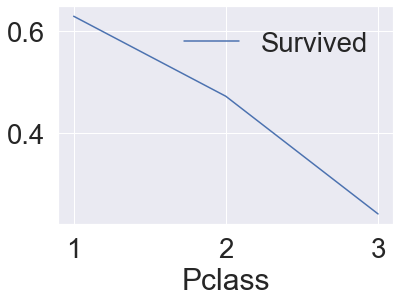

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot().bar()